##### Import statements

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# inorder to download VADER lexicon uncomment two lines below
# import nltk
# nltk.download( "vader_lexicon")

##### Loading textual dataset

In [2]:
df = pd.read_csv( "data/result/forbes-data.csv", sep=";")

##### Calculate polarity score

In [3]:
neg = []
neu = []
pos = []
compound = []

sid = SentimentIntensityAnalyzer()

for txt in df[ "text"]:
	score = sid.polarity_scores( txt)
	neg.append( score[ "neg"])
	neu.append( score[ "neu"])
	pos.append( score[ "pos"])
	compound.append( score[ "compound"])

df[ "neg"] = neg
df[ "neu"] = neu
df[ "pos"] = pos
df[ "compound"] = compound

##### Sentiment scores of first five samples

In [4]:
for i in range( 5):
	row = df.iloc[ i]
	print( f"Text: { row[ 'text']}")
	print( f"neg: { row[ 'neg']}, neu: { row[ 'neu']}, pos: { row[ 'pos']}, compound: { row[ 'compound']}")

Text: How Wall Street Got It So Wrong On Stocks Last Year, Remember, this time last year, the biggest Wall Street investment banks told us stocks would do just 3% in 2017.  How did the experts get it so wrong ...
neg: 0.163, neu: 0.837, pos: 0.0, compound: -0.8118
Text: The U.S. Economy in 2018, North Korea And The Deep State: Two Wars That Threaten Continued Growth, I do not have sufficient expertise to forecast how the North Korean nuclear threat will be weakened, if not dismantled. I do not expect a total victory of the deep state, but their war will succeed in chipping away some of the building blocks for higher 2018 economic growth.
neg: 0.198, neu: 0.682, pos: 0.12, compound: -0.631
Text: Top Apps For Keeping New Year's Resolutions, There’s no better time than New Year’s to embark on a little self-improvement. Check out some apps that’ll help you keep your resolutions on track.
neg: 0.06, neu: 0.738, pos: 0.202, compound: 0.6369
Text: The American Blogger Making Six-Figures While

##### Histogram of compound sentiment score of all samples

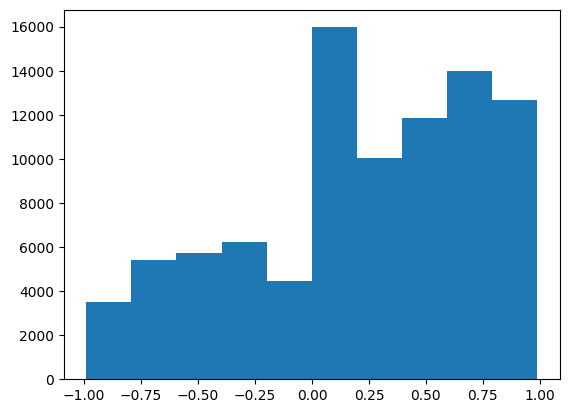

In [5]:
plt.figure()
plt.hist( compound, bins=10)
plt.show()

##### Plot compound score through time

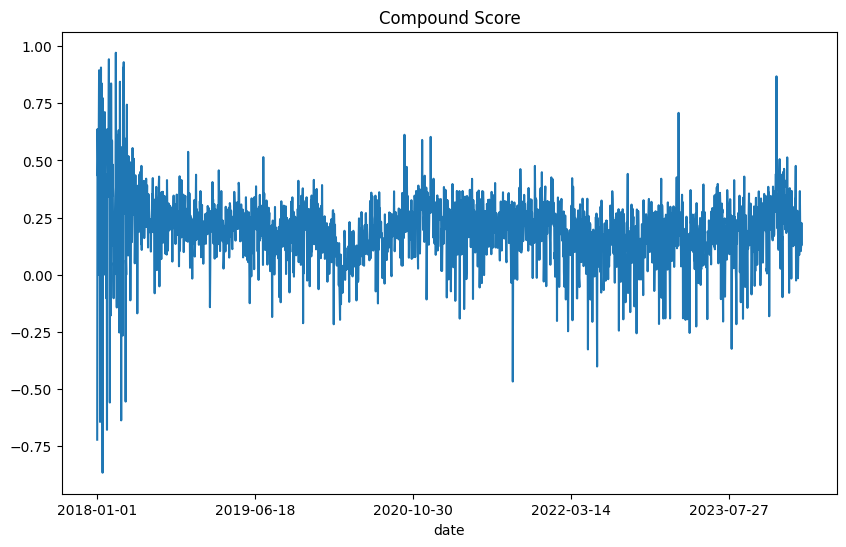

In [6]:
plt.figure( figsize=( 10, 6))

pd.DataFrame( {
	"date": [ df[ "date"][ i][ :10] for i in range( len( df))],
	"neg": df[ "neg"],
	"neu": df[ "neu"],
	"pos": df[ "pos"],
	"compound": df[ "compound"],
}).groupby( "date").mean()[ "compound"].plot()

plt.title( "Compound Score")
plt.show()

##### Saving result

In [7]:
df.to_csv( "data/result/forbes-data-with-sentiment.csv", sep=";", index=False)